In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
combine = pd.read_csv("nflcombine.csv", index_col="Year", parse_dates=True)

In [20]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6218 entries, 2000-01-01 to 2018-01-01
Data columns (total 15 columns):
Player       6218 non-null object
Pos          6218 non-null object
Ht           6218 non-null int64
Wt           6218 non-null int64
Forty        6046 non-null float64
Vertical     4796 non-null float64
BenchReps    4212 non-null float64
BroadJump    4754 non-null float64
Cone         3993 non-null float64
Shuttle      4063 non-null float64
Pfr_ID       4895 non-null object
AV           6218 non-null float64
Team         3738 non-null object
Round        3738 non-null float64
Pick         3738 non-null float64
dtypes: float64(9), int64(2), object(4)
memory usage: 777.2+ KB


In [21]:
combine.reset_index(inplace=True)

In [22]:
combine["Draft Year"] = combine["Year"]

In [23]:
combine.set_index("Year", inplace=True)

In [24]:
#find the top 10 fastest 40 times since 2000
combine[["Player", "Forty", "Pos"]].sort_values("Forty").head(10)

,Player,Forty,Pos
Year,,,
2017-01-01,John Ross,4.22,WR
2002-01-01,Donte' Stallworth,4.22,WR
2008-01-01,Chris Johnson,4.24,RB
2014-01-01,Dri Archer,4.26,WR
2013-01-01,Marquise Goodwin,4.27,WR
2005-01-01,Stanford Routt,4.27,CB
2015-01-01,J.J. Nelson,4.28,WR
2010-01-01,Jacoby Ford,4.28,WR
2017-01-01,Jalen Myrick,4.28,CB


In [25]:
#the highest bench press in the combine form 2000 to 2018 and what was their position
combine[["Pos", "Player", "BenchReps"]].sort_values("BenchReps", ascending = False).iloc[0]

Pos                    DT
Player       Stephen Paea
BenchReps              49
Name: 2011-01-01 00:00:00, dtype: object

In [26]:
#Fastese running back to come through the combine form 2000 to 2018 
combine[combine["Pos"] == "RB"][["Player", "Pos", "Forty", "Team"]].sort_values("Forty").iloc[0]

Player       Chris Johnson
Pos                     RB
Forty                 4.24
Team      Tennessee Titans
Name: 2008-01-01 00:00:00, dtype: object

In [27]:
#highest vertical for a Wide receiver from 2000 - 2018
combine[combine["Pos"] == "WR"][["Player", "Pos", "Vertical", "Team"]].sort_values("Vertical", ascending = False).iloc[0:2]

,Player,Pos,Vertical,Team
Year,,,,
2015-01-01,Chris Conley,WR,45.0,Kansas City Chiefs
2001-01-01,Chris Chambers,WR,45.0,Miami Dolphins


In [28]:
#find all QB drafted in the first round by the Cleveland Browns from 2000 to 2018
combine[(combine["Pos"] == "QB") & (combine["Round"] == 1.0) & (combine["Team"] == "Cleveland Browns")][["Player", "Team"]]

,Player,Team
Year,,
2007-01-01,Brady Quinn,Cleveland Browns
2012-01-01,Brandon Weeden,Cleveland Browns
2014-01-01,Johnny Manziel,Cleveland Browns


In [29]:
combine

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Pfr_ID,AV,Team,Round,Pick,Draft Year
Year,,,,,,,,,,,,,,,,
2000-01-01,John Abraham,OLB,76,252,4.55,NaN,NaN,NaN,NaN,NaN,AbraJo00,26.0,New York Jets,1.0,13.0,2000-01-01
2000-01-01,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,NaN,AlexSh00,26.0,Seattle Seahawks,1.0,19.0,2000-01-01
2000-01-01,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,AlfoDa20,0.0,Kansas City Chiefs,6.0,188.0,2000-01-01
2000-01-01,Kyle Allamon,TE,74,253,4.97,29.0,NaN,104.0,7.29,4.49,NaN,0.0,NaN,NaN,NaN,2000-01-01
2000-01-01,Rashard Anderson,CB,74,206,4.55,34.0,NaN,123.0,7.18,4.15,AndeRa21,6.0,Carolina Panthers,1.0,23.0,2000-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01,Chris Worley,ILB,74,238,4.86,29.5,15.0,NaN,NaN,NaN,WorlCh00,0.0,NaN,NaN,NaN,2018-01-01
2018-01-01,Isaiah Wynn,G,75,313,NaN,NaN,NaN,NaN,NaN,NaN,WynnIs00,0.0,NaN,NaN,NaN,2018-01-01
2018-01-01,Isaac Yiadom,CB,73,190,4.52,NaN,8.0,120.0,NaN,4.18,YiadIs00,0.0,NaN,NaN,NaN,2018-01-01


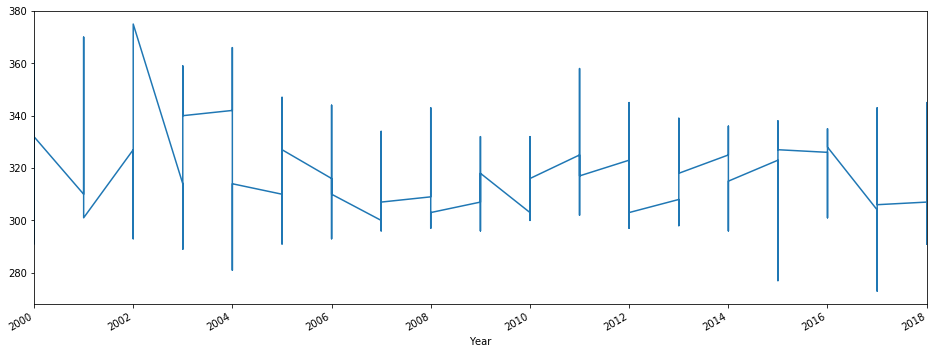

In [30]:
#check is there is an increse in weight for OT from 2000 to 2018
combine[combine["Pos"] == "OT"]["Wt"].plot(kind = "line", figsize = (16,6))

In [31]:
#the graph shows that there was a OT in 2002 thta was close to 380lbs find out who that was and what team
#they played for

In [32]:
combine[combine["Pos"] == "OT"][["Wt", "Player", "Team"]].sort_values("Wt", ascending = False).iloc[0]

Wt                     375
Player    Mike Williams-01
Team         Buffalo Bills
Name: 2002-01-01 00:00:00, dtype: object